Accuracy: 58.65%


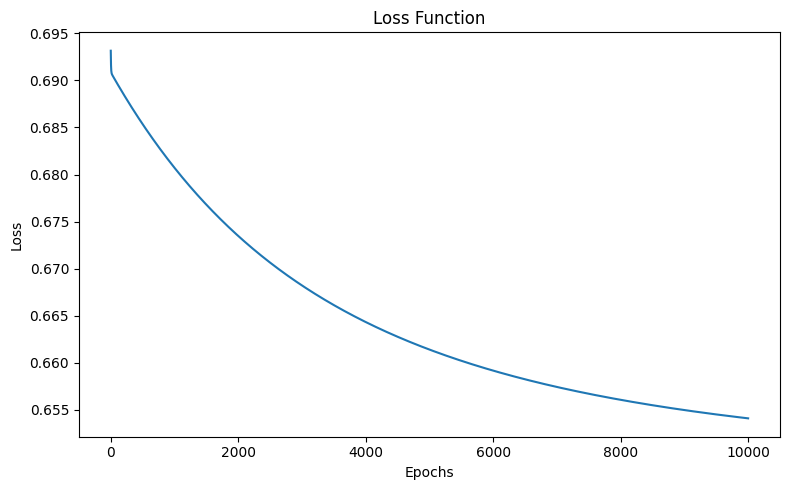

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/user/Desktop/sonar.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 'R', 1, 0)

X = X[:, :2]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(X, y, learning_rate=0.5, epochs=10000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        losses.append(loss_function(y, y_pred))

    return weights, bias, losses

weights, bias, losses = gradient_descent(X, y, learning_rate=0.5, epochs=10000)

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.where(y_pred >= 0.5, 1, 0)

predictions = predict(X, weights, bias)
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(8, 5))


plt.subplot(1, 1, 1)
plt.plot(losses)
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()